<a href="https://colab.research.google.com/github/zqiaohe/100daysofcode/blob/master/%D0%90%D0%B2%D1%82%D0%BE%D1%8D%D0%BD%D0%BA%D0%BE%D0%B4%D0%B5%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Суть проекта
*   В этом проекте мы будем убирать "шумы" с картинок.
*   [Автоэнкодеры ](https://ru.wikipedia.org/wiki/Автокодировщик)- это тип нейронных сетей, который используется для решения задачи кодирования данных ([обучения признакам](https://ru.wikipedia.org/wiki/Обучение_признакам))
*  На вход нейронной сети мы будем подавать зашумленные изображения из датасета Fashion Mnist (обычный общеизвестный учебный датасет)
* На выходе будем получать чистое изображение без шумов, пример на картиночке

![alt text](https://sun1-29.userapi.com/ylAKXhruTHaVA0jAFykZh-DEsefPLf6EEs1WsA/vKGHaGdmwJw.jpg)



**Автоэнкодер** - это такая нейронная сеть, которая на вход получает изображение, а на выход должна выдать то же самое изображение, прошедшее через "бутылочное горлышко", в котором изображение как бы сжимается. Автоэнкодер состоит из двух частей, "сжимающей" части - энкодер. И "восстанавливающей" части - декодер. "Бутылочное горлышко" не должно быть слишком маленьким, потому что тогда "восстанавливающая" часть нейронной сети не сможет ничего восстановить. Из-за архитектуры нейронной сети входной сигнал восстанавливается с ошибками, но, чтобы их минимизировать, сеть вынуждена учиться отбирать наиболее важные признаки.

![alt text](https://ai-news.ru/images/posts/pimg/pimg-787140.jpg)

Автоэнкодеры состоят из двух частей: энкодера g и декодера f. Энкодер переводит входной сигнал в его представление (код):

>*h = g(x)* 

Декодер восстанавливает сигнал по его коду:
> *x=f(h)*

Автоэнкодер, изменяя f и g, стремится выучить тождественную функцию x = f(g(x)), минимизируя какой-то функционал ошибки.
 

> *L(x, f(g(x)))*


При этом семейства функций энкодера g и декодера f как-то ограничены, чтобы автоэнкодер был вынужден отбирать наиболее важные свойства сигнала.

## Добавляем библиотеки и датасет

In [0]:
import pandas as pd #используется для манипуляций с датафреймами 
import numpy as np #для быстрых операций над матрицами
import matplotlib.pyplot as plt #для визуализации данных
import seaborn as sns #для ещё более крутой визуализации данных и особенно связей между данными, матриц корелляции т.п. 
import tensorflow as tf #гугловский фреймворк для создания моделей машинного обучения
import random #генератор случайных чисел

In [0]:
#Загружаем данные
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

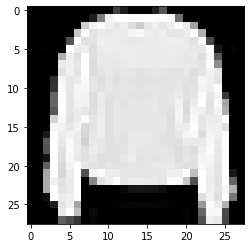

In [0]:
#Визуализируем один из примеров изображения
plt.imshow(X_train[7], cmap = 'gray')

In [0]:
#проверим размер или форму матрицы тренировочных данных 
X_train.shape
#6000 изображений по 28 на 28 пикселей

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

##Визуализация данных

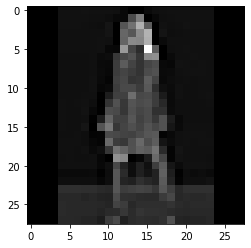

In [0]:
#Посмотрим на некоторые картинки
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap = 'gray')

In [0]:
label = y_train[i]
label

3

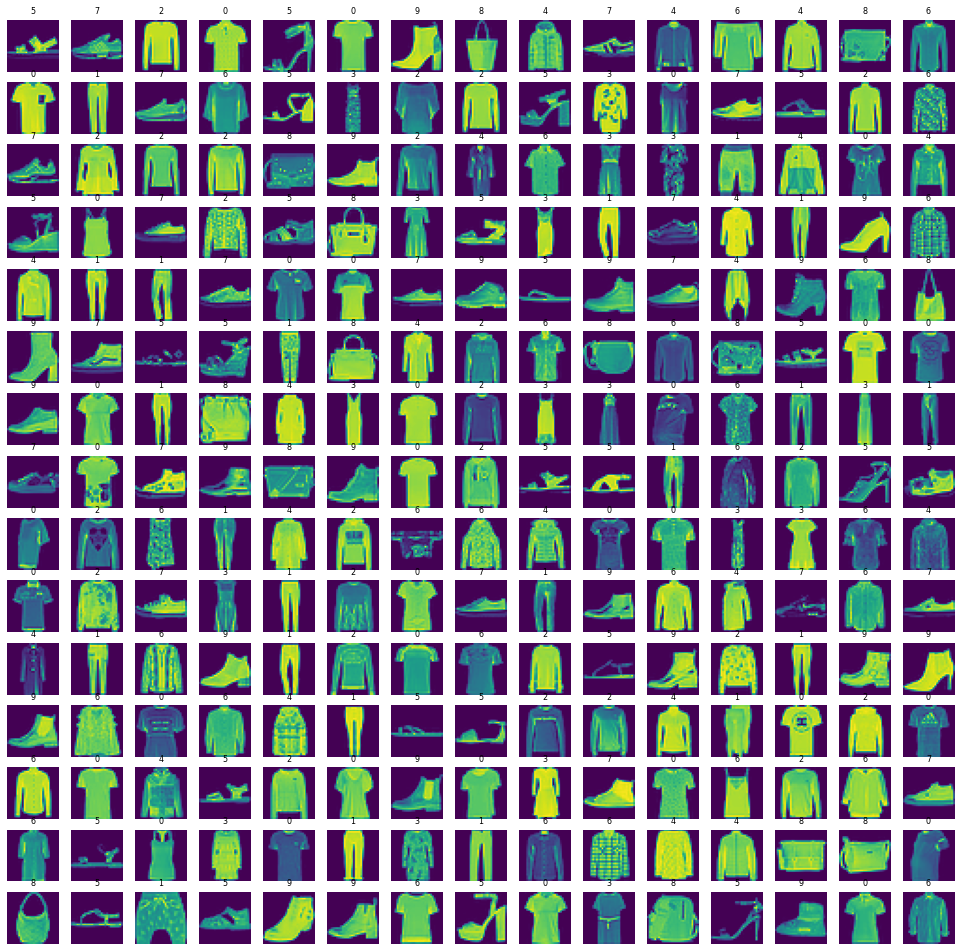

In [0]:
#посмотрим на большее количество изображений в формате сетки
#определим размерность сетки


W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))

axes = axes.ravel() #превратить матрицу 15 на 15 в одномерный массив размрностью 225 

n_training = len(X_train) #размер тренировочного датасета

#Выберем случайные номера от нуля до n_training

for i in np.arange(0, W_grid*L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')

##Предобработка данных

In [0]:
#нормализовать данные
X_train = X_train/255
X_test = X_test/255

In [0]:
#добавить шум, создадим "шумный" датасет

noise_factor = 0.1
noise_dataset = []
for img in X_train:
  noisy_image = img + noise_factor * np.random.randn (*img.shape)
  noisy_image = np.clip(noisy_image, 0, 1)
  noise_dataset.append(noisy_image)

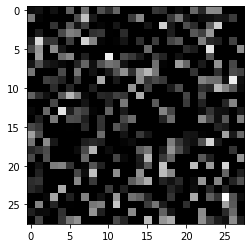

In [0]:
plt.imshow(noise_dataset[2], cmap = 'gray')

In [0]:
noise__test_dataset = []
for img in X_train:
  noisy_image = img + noise_factor * np.random.randn (*img.shape)
  noisy_image = np.clip(noisy_image, 0, 1)
  noise__test_dataset.append(noisy_image)

##Создаем и тренируем автоэнкодер


In [0]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filter = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filter = 8, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filter = 8, kernel_size = 3, strides = 1, padding = 'same'))

#decoder

